In [144]:
import sympy 
from sympy.parsing.sympy_parser import parse_expr
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import re

class CustomEquation():
    def __init__(self,):
        self.varObjs = []
        self.varSubs = {}
        self.expression = None
        
    def addVar(self, varN, varE):
        tmp = self.CustomVariable(varN, varE)
        self.varObjs.append(tmp)
    
    def set_varObj(self, index, varN, varE):
        if len(self.varObjs) <= index:
            print('error')
        else:
            self.varObs[index].set_again(varN, varE)
            
            
    def imager(self, str_eq):
        rc('text', usetex=True)
        rc('font', family='serif')
        plt.text(0.2,0.2, '$' + str_eq + '$', fontsize=100)
        plt.axis('off')
        plt.show()
    
    def recalcSub(self):
        self.varSubs = {}
        for elmnt in self.varObjs:
            self.varSubs[elmnt.sympyVar] = elmnt.val
    def setSpectrumData(self, data):
        self.spectrum = data
        
        for elmnt in self.varObjs:
             elmnt.calcvalue(data)
        #shape (:,2)
        #column 0 will represnets the wavelength
        #column 1 will represents value
        
    class CustomVariable():
        def __init__(self, varname, varExpr):
            self.var = varname
            self.exp = varExpr
            self.sympyVar = sympy.symbols(self.var)
            self.val = 0
            ####################################################
            self.keyword = ''
            if "ave" in varExpr:
                self.keyword = 'a'
            elif "max" in varExpr:
                self.keyword = 'x'
            elif "min" in varExpr:
                self.keyword = 'n'
            else:
                self.legit = False

            self.startWL = 0
            self.end__WL = 0
            if len(re.findall("\d+", varExpr)) == 2:
                try:
                    self.startWL, self.end__WL = [int(s) for s in re.findall("\d+", varExpr)]
                except:
                    self.legit = False
            else:
                self.legit = False 
            ####################################################
        def set_again(self, varname, varExpr):
            self.var = varname
            self.exp = varExpr
            self.sympyVar = sympy.symbols(self.varname) 
        def setvalue(self, val):
            self.val = val
        def calcvalue(self, data):
            index = np.logical_and(data[:,0] >= self.startWL, data[:,0] <= self.end__WL) 
            if self.keyword == 'a':
                self.val = np.mean(data[index,1])
            if self.keyword == 'x':
                self.val = np.max(data[index,1])
            if self.keyword == 'n':
                self.val = np.min(data[index,1])
            print(self.val)



In [151]:
eq = CustomEquation()
eq.addVar("Red", "ave[600, 680]")
eq.addVar("Nir", "ave[720, 780]")
eq.expression = (eq.varObjs[0].sympyVar + eq.varObjs[1].sympyVar) / (eq.varObjs[0].sympyVar - eq.varObjs[1].sympyVar)
eq.expression

(Nir + Red)/(-Nir + Red)

In [152]:
eq.setSpectrumData(calcRef)
eq.recalcSub()
eq.varSubs

eq.varObjs[0].keyword

0.044415932884048194
0.3755642549216096


'a'

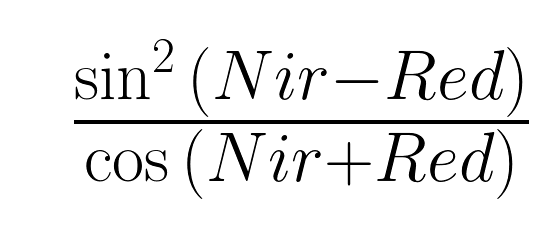

0.115769714247937

In [157]:
z= parse_expr("sin(Nir - Red)**2/cos(Nir + Red)")
eq.imager(sympy.latex(z))
z.subs( eq.varSubs)

In [62]:
z= parse_expr("(Nir + Red)/(Nir - Red)")
z

(Nir + Red)/(Nir - Red)

In [56]:
sympy.latex(z)


'\\frac{Nir + Red}{Nir - Red}'

In [59]:
eq.imager(r'\frac{Nir + Red}{Nir - Red}')

RuntimeError: latex was not able to process the following string:
b'\\\\frac{Nir + Red}{Nir - Red}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.21 (MiKTeX 20.6.29)
entering extended mode
(/home/garid/.cache/matplotlib/tex.cache/4b69cbcadd12c97c98b29edd67d463f8.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-09-03>
(/home/garid/.miktex/texmfs/install/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/home/garid/.miktex/texmfs/install/tex/latex/base/size10.clo))
(/home/garid/.miktex/texmfs/install/tex/latex/type1cm/type1cm.sty)
(/home/garid/.miktex/texmfs/install/tex/latex/base/textcomp.sty)
(/home/garid/.miktex/texmfs/install/tex/latex/base/inputenc.sty)
(/home/garid/.miktex/texmfs/install/tex/latex/geometry/geometry.sty
(/home/garid/.miktex/texmfs/install/tex/latex/graphics/keyval.sty)
(/home/garid/.miktex/texmfs/install/tex/generic/iftex/ifvtex.sty
(/home/garid/.miktex/texmfs/install/tex/generic/iftex/iftex.sty))
(/home/garid/.miktex/texmfs/install/tex/latex/geometry/geometry.cfg)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (/home/garid/.miktex/texmfs/install/tex/latex/l3backend/l3backend-dvips.def)
(4b69cbcadd12c97c98b29edd67d463f8.aux)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 ...000}{\rmfamily \frac{Nir + Red}{Nir - Red}
                                                  }
No pages of output.
Transcript written on 4b69cbcadd12c97c98b29edd67d463f8.log.




<Figure size 432x288 with 1 Axes>

In [64]:
def imager(str_eq):
    rc('text', usetex=True)
    rc('font', family='serif')
    plt.text(0,0.15, '$' +  str_eq + '$', fontsize=46)
    plt.axis('off')

    plt.show()


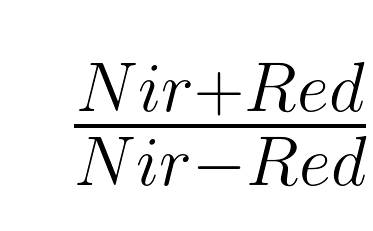

In [67]:
def imager( str_eq):
    rc('text', usetex=True)
    rc('font', family='serif')
    plt.text(0.2,0.2, '$' + str_eq + '$', fontsize=100)
    plt.axis('off')
    plt.show()
imager(sympy.latex(z))

,PIXEL,WAVELENGTH,LEAF,GRAY,WHITE,BG
0,0,240.2,16.0000,16.0200,16.0259,16.0
1,1,242.4,16.0000,16.0333,16.0432,16.0
2,2,244.6,16.0000,16.0067,16.0086,16.0
3,3,246.8,16.0000,16.0133,16.0173,16.0
4,4,249.0,16.0229,16.0467,16.0605,16.0
...,...,...,...,...,...,...
475,475,1285.2,16.0000,16.0000,16.0000,16.0
476,476,1287.4,16.0000,16.0000,16.0000,16.0
477,477,1289.6,16.0000,16.0000,16.0000,16.0
478,478,1291.8,16.0000,16.0000,16.0000,16.0


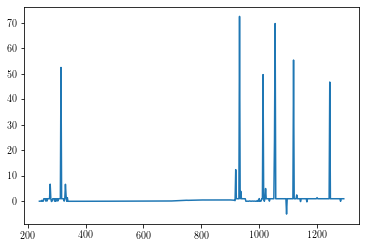

In [97]:
np.argmax(calcRef[:,1])

315

In [98]:
calcRef[479,0]
readData[315,:]

array([315.    , 933.2   ,  16.0714,  16.    ,  16.    ,  16.    ])

In [99]:
(16.0714-15.999)/(16-15.999)

72.40000000004015

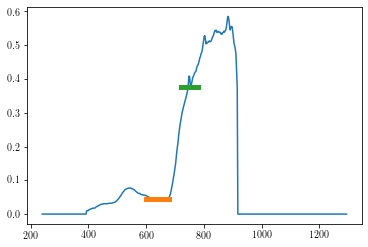

In [155]:
s = '/home/garid/myGithub/gimbalSoft_wl/0706/2019-12-21/11h_ザルディbad/20191221_111801_crop.csv'
import pandas as pd

readData = np.array(pd.read_csv(s))
calcRef = np.zeros((readData.shape[0], 2))
calcRef[:,0] = readData[:,1]
calcRef[:,1] = (readData[:,2] - 15.999) / (readData[:,4] - 15.999)

pd.read_csv(s)
index16 = np.logical_or(readData[:,2] <= 17, readData[:,4] <= 17)
calcRef[index16,1] = 0
plt.plot(calcRef[:,0], calcRef[:,1])
plt.plot([eq.varObjs[0].startWL,eq.varObjs[0].end__WL], [eq.varObjs[0].val, eq.varObjs[0].val], linewidth = 5)
plt.plot([eq.varObjs[1].startWL,eq.varObjs[1].end__WL], [eq.varObjs[1].val, eq.varObjs[1].val], linewidth = 5)

In [110]:
np.argmax(calcRef[:,1])

41

In [111]:
calcRef[41,:]

array([330.4    ,   6.65625])

In [112]:
readData[41,:]

array([ 41.    , 330.4   ,  16.0629,  16.0067,  16.0086,  16.    ])